In [3]:
%matplotlib inline
%precision 16
from __future__ import print_function
from six.moves import range
import numpy
import math
import matplotlib.pyplot as plt

import scipy.sparse as sparse
import scipy.linalg
import scipy.sparse.linalg as linalg

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

Me myself and I

# HW 5: Parabolic Problems

# Question 1 - Parabolic + Periodic BCs

Consider the temperature distribution in a thin circular ring with perimeter $2L$. Assume that the lateral surfaces are perfectly insulated, such that the temperature is distributed evenly throughout the ring cross-section and that the ends at $x=-L$ and $x=L$ are in perfect thermal contact.

This mathematical problem can be formulated as a heat equation with factor $k \in \mathbb R$ and periodic boundary conditions.
$$
    \frac{\partial u}{\partial t} = k \ \frac{\partial^2 u}{\partial x^2} \qquad \mbox{on } [-L,L]\times \mathbb R_+\\
    u(x,0) = u_0(x) ~~~~~~ u(-L,t) = u(L,t) ~~~~~ \frac{\partial}{\partial x} u(-L,t) = \frac{\partial}{\partial x} u(L,t).
$$

**(a)** [10] Solve the problem analytically.

## Answer to Question 1 (a)

Since we have no idea what exactly is $u(x, t)$, we can first use Separation of Variables to generate two seperate ODEs as below:

$$
\begin{aligned}
u(x, t) &= g(x)h(t)\\
\frac{dh}{dt} &= -\lambda kh \\
\frac{d^2 g }{dx^2} &= -\lambda g
\end{aligned}
$$

We can then solve $h(t)$ by the process below:

$$
\begin{aligned}
\frac{dh}{dt} &= -\lambda kh\\
\frac{1}{h}\frac{dh}{dt} &= -\lambda k\\
ln(h(t)) &= - \lambda kt + c\\
h(t) &= \exp(- \lambda kt + c)\\
&= c \cdot \exp(- \lambda kt)
\end{aligned}
$$

Since we know $\frac{d^2 g(x) }{dx^2} = -\lambda g(x)$, we can then take some simple assumptions that $g(x)$ actually is something that has a strong relationship with $\sin$ and $\cos$. We then can write g(x) as below:

$$
g(x) = c_1 \cos\sqrt{\lambda}x + c_2 \sin\sqrt{\lambda}x
$$

Since we know $u(-L,t) = u(L,t)$, which means $g(-L) = g(L)$

$$
\begin{aligned}
g(-L) &= g(L)\\
c_1 \cos\sqrt{\lambda}(-L) + c_2 \sin\sqrt{\lambda}(-L) &= c_1 \cos\sqrt{\lambda}(L) + c_2 \sin\sqrt{\lambda}(L)\\
c_1 \cos\sqrt{\lambda}(L) + c_2 \sin\sqrt{\lambda}(-L) &= c_1 \cos\sqrt{\lambda}(L) + c_2 \sin\sqrt{\lambda}(L)\\
c_2 \sin\sqrt{\lambda}(-L) &= c_2 \sin\sqrt{\lambda}(L)\\
\end{aligned}
$$

But we know from the definition that $\sin(-L) = -\sin(L)$, we then know the equation below will make sure the result above happen

$$
\lambda = \left(\frac{n\pi}{L}\right)^2
$$

We use the other boundary condition to get $c_1$ hopefully: $\frac{d g(x)}{dx}=\sqrt{\lambda}\left(-c_1 \sin\sqrt{\lambda}x + c_2 \cos\sqrt{\lambda}x\right)$

If we want to satisify the boundary condition, we should set $c_1 \sqrt{\lambda}\sin\sqrt{\lambda}L$ equal to 0 as below:

$$
c_1 \sqrt{\lambda}\sin\sqrt{\lambda}L = 0
$$

Then we get actually the same thing! Then we can substitute $\lambda$ into our $g(x)$

$$
g(x) = \cos\frac{n\pi x}{L},\sin\frac{n\pi x}{L},n=1,2,3,\ldots
$$

We then substitute our $g(x)$ and $h(x)$ together and then will get something below:

$$
u(x,t) = a_0 + \sum_{n=1}^{\infty} a_n \cos\frac{n\pi x}{L}e^{-\left(\frac{n\pi}{L}\right)^2 kt}
+\sum_{n=1}^{\infty} b_n \sin\frac{n\pi x}{L}e^{-\left(\frac{n\pi}{L}\right)^2 kt}
$$

Since there is another initial condition we have not used: $u(x,0) = f(x)$, we can get:

$$u_0(x) = a_0 + \sum_{n=1}^{\infty} a_n \cos\frac{n\pi x}{L} + \sum_{n=1}^{\infty} b_n \sin\frac{n\pi x}{L}$$

We can get $a_0$, $a_n$, and $b_n$ using orthogonality of sines and cosines:

$$
\begin{aligned}
a_0 &= \frac{1}{2L}\int_{-L}^{L}u_0(x) dx \\
a_n &= \frac{1}{L}\int_{-L}^{L}u_0(x) \cos\frac{n\pi x}{L} dx \\
b_n &= \frac{1}{L}\int_{-L}^{L}u_0(x) \sin\frac{n\pi x}{L} dx
\end{aligned}
$$

**(b)** [10] Write down the discretization for the problem resulting from using the Crank-Nicholson method showing the full matrix representation of the discretization and how you came to that representation.  Note that the periodicity will cause there to be a dependence that "wraps around" the domain so that the left most point in the domain depends on the right most point and vice-versa.

## Answer to Question 1 (b)


Crank-Nicholson Method is shown as below(taken from notes):
$$
    -r U^{n+1}_{i-1} + (1 + 2r) U^{n+1}_i - r U^{n+1}_{i+1} = r U^{n}_{i-1} + (1 - 2r) U^{n}_{i} + r U^{n}_{i+1}
$$
where $r = \frac{\Delta t}{2 \Delta x^2}$

We can know the equation below from 1st order finite differences:

$$
\frac{U_1 - U_0}{\Delta x} = \frac{U_0 - U_m}{\Delta x}
$$

We can then derive something below:

$$
U_0 = \frac{U_1 + U_m}{2}
$$

When $i=0$:

$$
A = \frac{1}{2}(U_1 + U_m)
$$

When $i=m$:

$$
A = -rU_{m-1} + (1 + \frac{3}{2}U_m) - \frac{r}{2}U_1 
$$

$$
B = rU_{m-1} + (1 - \frac{3}{2}U_m) + \frac{r}{2}U_1 
$$

The final matrix will be:

$$
\begin{bmatrix}
1+2r & -r & & & & -r \\
-r & 1+2r & -r \\
& -r & 1+2r & -r \\
& & \ddots & \ddots & \ddots \\
& & & -r & 1+2r & -r \\
-r & & & & -r & 1+2r
\end{bmatrix}
$$


**(b)** [10] Write a function to solve this problem using the Crank-Nicholson method.

In [26]:
def solve_heat_periodic_CN(m, kappa, L, t_0, t_final, U_0):
    """Solve the heat equation on a periodic domain using Crank-Nicholson
    
    :Input:
     - *m* (int) Number of points use to discretize the domain.  Note that
       the total number of points is *m+1*.
     - *kappa* (float) Diffusion coefficient
     - *L* (float) Length of half of the domain
     - *t_0* (float) Starting time
     - *t_final* (float) Time to integrate to
     - *U_0* (numpy.ndarray) Initial condition at time t_0, should be m+1
     
    :Output:
     - (numpy.ndarray) Solution at time t_final.  Note that this vector should m+1
    """
    
    # discretization
    delta_x = (2.0 * L) / float(m + 1)
#     delta_t = 0.5 * delta_x**2
    step = int(0.1*m)
    print(step)
    t = numpy.linspace(t_0, t_final, step)
    delta_t = t[1] - t[0]
    N = len(t)
    
    U = numpy.empty((N, m + 1))

    # Initial and boundary conditions
    U[0, :] = U_0
    
    r = numpy.ones(m+2)*(kappa*delta_t)/(2*delta_x**2)
    A = sparse.spdiags([-r, -r, 1+2*r, -r, -r], [-m, -1, 0, 1, m], m+1, m+1).tocsr()
    B = sparse.spdiags([r, r, 1-2*r, r, r], [-m, -1, 0, 1, m], m+1, m+1).tocsr()
    
    for n in range(1, len(t)):
        b = B.dot(U[n-1,:])
        U[n, :] = linalg.spsolve(A,b)
    
    U = U[-1,:]
    
    return U

20
20
20
20
Error = 0.0007025287762257007
Success!


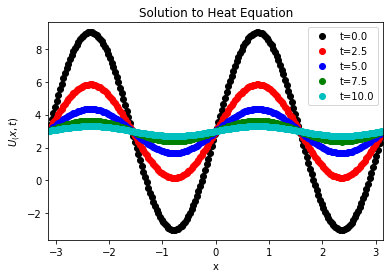

In [27]:
L = numpy.pi
kappa = 0.075
u_true = lambda x, t: 6.0 * numpy.sin(2.0 * numpy.pi / L * x) * numpy.exp(-4.0 * kappa * (numpy.pi / L)**2 * t) + 3.0

# Discretization and output times
# Note that there are m unknowns including one of the points either at 0 or L
m = 200
delta_x = (2.0 * L) / float(m + 1)
x = numpy.linspace(-L, L, m + 2)
x_fine = numpy.linspace(-L, L, 100)
output_times = (0.0, 2.5, 5.0, 7.5, 10.0)

# Solve
U = numpy.empty((len(output_times), m + 1))
U[0, :] = u_true(x[:-1], 0.0)
for (n, t) in enumerate(output_times[1:]):
    U[n + 1, :] = solve_heat_periodic_CN(m, kappa, L, output_times[n], t, U[n, :])

error = numpy.linalg.norm(delta_x * (U[-1, :] - u_true(x[:-1], output_times[-1])), ord=1)
print("Error = %s" % error)
assert error < 1e-3
print("Success!")

# Plot some of the results
colors = ['k', 'r', 'b', 'g', 'c']
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
for (n, t) in enumerate(output_times):
    axes.plot(x_fine, u_true(x_fine, t), 'k-')
    axes.plot(x[:-1], U[n, :], "o%s" % colors[n], label='t=%s' % numpy.round(t, 4))
    axes.set_xlabel("x")
    axes.set_ylabel("$U_(x,t)$")
    axes.set_title("Solution to Heat Equation")
    axes.set_xlim([-L, L])
    axes.legend()
plt.show()

# Question 2 - Diffusion and Decay

Consider the partial differential equation 

$$
    \frac{\partial u}{\partial t} = \kappa \frac{\partial^2 u}{\partial x^2} -\gamma u,
$$

which models a diffusion with parameter $\kappa \in \mathbb R_{>0}$ with decay specified by $\gamma \in \mathbb R_{>0}$.

Consider a $\theta$-method of the form

$$
    U_j^{n+1} = U_j^n + \frac {\Delta t} {2\Delta x^2} \left( U_{j-1}^n - 2 U_j^n + U_{j+1}^n + U_{j-1}^{n+1} - 2U_j^{n+1}+U_{j+1}^{n+1} \right)-\Delta t\gamma\left( (1-\theta) U^n_j +\theta U_j^{n+1} \right)
$$

where $\theta$ is a parameter.

**(a)** [15] Assume $\kappa = 1 $, by computing the local truncation error, show that this method is $p$th order accurate in time and second order accurate in space, where $p=2$ for $\theta = 0.5$ and $p=1$ otherwise.

## Answer to Question 2(a)

We first replace all the $U_a^b$ by $u(x(\pm \Delta x), t(\pm \Delta t))$ and get:

$$
    u(x,t+\Delta t) = u(x,t) + \frac {\Delta t} {2\Delta x^2} \left( u(x-\Delta x,t) - 2 u(x,t) + u(x,t+\Delta t) + u(x-\Delta x,t+\Delta t) - 2u(x,t+\Delta t)+u(x+\Delta x,t + \Delta t) \right)-\Delta t\gamma\left( (1-\theta) u(x,t) +\theta u(x,t+\Delta t) \right)
$$

We then expand our $\theta-method$ using Taylor expansion and two variables expansion:

$$
u_t(x, t) + u_{tt}(x, t)\frac{\Delta t^2}{2} + u_{ttt}(x, t)\frac{\Delta t^3}{6} +u_{tttt}(x, t)\frac{\Delta t^4}{24}- \Delta t u_{xx}(x, t)  - \frac{\Delta t^2}{2}u_{xxt}-\frac{\Delta t^3}{4} u_{xxtt}(x,t)+ \gamma \Delta tu(x, t) + \theta \gamma \Delta t^2 u_t(x, t) + \theta \gamma \frac{\Delta t^3}{2}u_{tt}(x, t) + \theta \gamma \frac{\Delta t^4}{6} u_{ttt}(x,t)  + \theta \gamma \frac{\Delta t^5}{24} u_{tttt}(x,t)= 0
$$

We have $u_t = u_{xx} - \gamma u$

$$
u_{tt}\frac{\Delta t^2}{2} + u_{ttt}\frac{\Delta t^3}{6} +u_{tttt}\frac{\Delta t^4}{24} - \frac{\Delta t^2}{2}u_{xxt}-\frac{\Delta t^3}{4} u_{xxtt}+\theta \gamma \Delta t^2 u_t + \theta \gamma \frac{\Delta t^3}{2}u_{tt} + \theta \gamma \frac{\Delta t^4}{6} u_{ttt} + \theta \gamma \frac{\Delta t^5}{24} u_{tttt}= 0
$$

I expanded it to $u^{4}$ and $u_{xx}$s are left but there is no $\Delta x^2$ since all $\Delta x$ are cancelled out because of $\frac{\Delta t}{\Delta x^2}$. So, by observation, if we expand the equaion to $u^{(6)}$, it will be second order accurate in space. 

When $\theta=0.5$, the truncation error is lead by the $\Delta t^2$ term, we then know $p = 2$


**(b)** [15] Using von Neumann analysis, show that this method is unconditionally stable if $\theta \geq 0.5$.

## Answer to Question 2(b)

Substitute $U^n_j = e^{ij\Delta x \xi}$ into the $\theta - method$ and get something below:

$$
U_j^{n+1} = U_j^n + \frac {\kappa \Delta t} {2\Delta x^2} \left[ \left(e^{i \Delta x \xi} - 2 + e^{-i\Delta x \xi} \right) U^n_{j}+ \left(e^{i \Delta x \xi} - 2 + e^{-i\Delta x \xi} \right) U^{n+1}_{j} \right ]-\Delta t\gamma\left( (1-\theta) U^n_j +\theta U_j^{n+1} \right)
$$

Set $U^{n+1}_j = g(\xi) U^n_j$ and get:

$$
g(\xi) = 1 + \frac {\kappa \Delta t} {2\Delta x^2} \left(  e^{i \Delta x \xi} - 2 + e^{-i\Delta x \xi} \right ) (1 + g(\xi))-\Delta t\gamma\left( (1-\theta)+\theta g(\xi) \right)
$$

If we set $z =  e^{i \Delta x \xi} - 2 + e^{-i\Delta x \xi}  =\cos(\xi \Delta x) - 1$, then we can get $g(x)$ below:

$$
g(\xi) = \frac{1+\frac{\Delta t}{\Delta x^2}\frac{\kappa}{2}z-\frac{\Delta t}{\Delta x^2}\Delta t \gamma (1-\theta)}{1-\frac{\Delta t}{\Delta x^2}\frac{\kappa}{2}z+\frac{\Delta t}{\Delta x^2}\Delta t \gamma \theta}
$$

It is easily to see unconditional stability of $\theta - method$ is for $\theta \geq 0.5$.

**(c)** [10] Show that, if $\theta = 0$, then the method  is stable provided $\Delta t \leq \frac 2 \gamma$, independent of $\Delta x$.

## Answer to Question 2(c)

If we want it be something stable, the absolute value will be smaller than 1, we then can get:

$$
g(\xi) = \frac{1 + \frac{\Delta t}{2\Delta x^2}\left(f(z) - 2\Delta x^2 \gamma \right) }{1 - \frac{\Delta t}{2\Delta x^2}f(z) }  \leq 1
$$

$f(z) \leq 0$ for all $\xi$:

$$
\begin{aligned}
f(z) &\leq 0\\  
1 + \frac{\Delta t}{2\Delta x^2}\left(f(z) - 2\Delta x^2 \gamma \right) &\geq g(\xi)
\end{aligned}
$$

Then we can have:

$$
\begin{aligned}
f(z) - 2\Delta x^2 \gamma &< 0\\
f(z) &< -2\Delta x^2 \gamma
\end{aligned}
$$

Substitute $f(z) \geq \frac{-4\Delta t}{\Delta x^2}$.

$$ 
\frac{-4\Delta t}{\Delta x^2} \leq -2\Delta x^2 \gamma \\
\Delta t \leq \frac{2}{\gamma}
$$

## Question 3 - Leapfrog for the Heat Equation

Consider the following method for solving the heat equation $u_t=u_{xx}$:
$$
U_i^{n+2} = U_i^n + \frac{2 \Delta t}{\Delta x^2}(U_{i-1}^{n+1} - 2U_i^{n+1} + U_{i+1}^{n+1}).
$$

**(a)** [15] Determine the order of accuracy of this method (in both space and time).

## Answer to Question 3 (a)

We first rewrite the equation using $u(x, t)$ as below:

$$
u(x, t+2\Delta t) = u(x, t) + \frac{2 \Delta t}{\Delta x^2}(u(x-\Delta x, t+\Delta t) - 2u(x, t+\Delta t) + u(x+\Delta x, t+\Delta t)).
$$

We first apply double variables taylor expansion on $u(x \pm \Delta x, t+\Delta t)$, and get something below:

$$
u(x-\Delta x, t+\Delta t) = u(x,t) \pm \Delta x u_x(x,t) + \Delta t u_t(x,t) + \frac{\Delta x^2}{2} u_{xx}(x,t) \pm \frac{\Delta x \Delta t}{2} u_{xt}(x,t) + \frac{\Delta t^2}{2} u_{tt}(x,t) + \mathcal{O}(\Delta x^3, \Delta t^3)
$$

In order to simply the equation we can simply expand $u(x \pm \Delta x, t+\Delta t)$ around $U^{n+1}_i$ instead of doing double variables Taylor expansion and got something below for the inner part:


$$
U_{i-1}^{n+1} - 2U_i^{n+1} + U_{i+1}^{n+1} = \Delta x^2 u^{(2)}(x, t+\Delta t) + \frac{\Delta x^4}{12} u^{(4)}(x, t+\Delta t)
$$

We then expand $U_i^{n+2}$ in order to know the order of accuracy:

$$
U_i^{n+2} = u(x,t) + 2\Delta t u_t(x,t) + \frac{4 \Delta t^2}{2}u_{tt}(x,t)+ \frac{8\Delta t^3}{6}u_{ttt}(x, t)+\mathcal{O}(\Delta t^4)
$$

We then calculate the truncation error of the method below

$$
U_i^{n+2} - U_i^n - \frac{2 \Delta t}{\Delta x^2}(U_{i-1}^{n+1} - 2U_i^{n+1} + U_{i+1}^{n+1}) = 2\Delta t u_t(x,t) + \frac{4 \Delta t^2}{2}u_{tt}(x,t)+ \frac{8\Delta t^3}{6}u_{ttt}(x, t)+\mathcal{O}(\Delta t^4) - \frac{2 \Delta t}{\Delta x^2} \left(\Delta x^2 u^{(2)}(x, t+\Delta t) + \frac{\Delta x^4}{12} u^{(4)}(x, t+\Delta t)\right)\\
$$

We also know $u_t = u_{xx}$ and substitute this equation into our formula above and we can get the order of accuracy should by 2 for both spatial and time

**(b)** [10] Suppose we take $\Delta t=\alpha \Delta x^2$ for some fixed $\alpha>0$ and refine the grid.  For what values of $\alpha$ (if any) will this method be Lax-Richtmyer stable and hence convergent?  

_HINT:_ Consider the method-of-lines interpretation and the stability region of
the time-discretization being used.

## Answer to Question 3(b)


Since the linear method of the Lax-Richtmyer stablility is something below:
$$
    U^{n+1} = B(\Delta t) U^n + b^n(\Delta t)
$$

We then aim at finding the equation that contains $U^{n+1}, B(\Delta t), U^n$ all

For the given heat equation $u_{t}=u_{x x}$, we can approximate $u_{x x}$ by the centered difference and have:

$$
u_{i}^{\prime}(t)=\frac{1}{\Delta x^{2}}\left(u_{i+1}(t)-2 u_{i}(t)+u_{i-1}(t)\right)
$$

We then can get a system of time-dependence ODEs as below:

$$
U^{\prime}(t) = \frac{1}{\Delta x^2}\begin{bmatrix}
-2 & 1 \\
1 & -2 & 1 \\
& 1 & -2 & 1 \\
& & \ddots & \ddots & \ddots \\
& & & 1 & -2 & 1 \\
& & & & 1 & -2
\end{bmatrix} U(t)
$$

We can first suppose some boundary conditions and do the calculation since we will know later that no matter what BC we suppose, they will not affect the final outcome!

Suppose Pure Dirichlet boundary conditions and we know the eigenvalues will be:

$$
\lambda_{j}=-\frac{4}{h^{2}} \sin ^{2}\left(\frac{\pi j}{2(n+1)}\right)
$$

Since the definition of spectral radius is the megnitude of the largest eigenvalue. We take the range of $Sin(x)$ into consideration and will know that the spectral radius will definitely be:

$$
\lambda_{j}=\frac{4}{h^{2}} = \frac{4}{\Delta x^2}
$$

We rewrite the ODE and calculate the stable region and can get one of the condition as the equation below:
$$
\sqrt{(1+2\alpha -3\alpha^2)}
$$

We know the inner part should larger than 0 then we can know $\alpha$ should be smaller than 1.

We can also do the calculation from analyzing the stability of Leapfrog. I got the equation below from 4300 by setting $U^{n+2} = U^{n+1} \xi = U^n \xi^2$

$$
\xi^2 -z\xi -1 = 0
$$

We then know the roots should be:

$$
\xi_{1,2} = z \pm \sqrt{z^2 + 1}
$$

Actually we know that leapfrog is not a stable method since we could not make both roots larger than 1 at the same time by the following proof:

$$
|\xi_1 \cdot \xi_2| = 1 = |\xi_1||\xi_2|
$$

From the textbook we know it can be shown that if z is a pure imaginary number of the form $z = i\alpha$ with $|\alpha |< 1$, then$|\xi_1| =|\xi_2| = 1$

**(c)** [5] Is this a useful method?

## Answer to Question 3(c)

This is not quite a useful method since there are some restrictions on the relationship between $\Delta t$ and $\Delta x$ and only when $\Delta t$ is relatively small, or lets say $\frac{\Delta t}{\Delta x^2} \leq 1$,then the method will be stable.

The stability region consists only of the open interval from $-i$ to $i$ on the imaginary axis

We know from the notes that Crank-Nicholson is a relatively stable method regardless of the choice of $\Delta t$ and $\Delta x$